# Exercício 2

Alexandre Herrero Matias - 1890484

**1- Utilize o dataset “titanic.csv”, fornecido pelo professor. Faça o pré-processamento necessário,
pelo menos o mínimo, para a utilização de uma Árvore de Decisão para classificar se um indivíduo
sobreviveu ou não. Liste os passos realizados.**

In [71]:
from sklearn import tree
import pandas as pd

In [72]:
dfTitanic = pd.read_csv('titanic.csv').set_index('Name')
dfTitanic

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
Rev. Juozas Montvila,0,2,male,27.0,0,0,13.0000
Miss. Margaret Edith Graham,1,1,female,19.0,0,0,30.0000
Miss. Catherine Helen Johnston,0,3,female,7.0,1,2,23.4500


In [73]:
dfTitanic['Sex'] = pd.Categorical(dfTitanic['Sex'])

dfTitanic['SexCode'] = dfTitanic['Sex'].cat.codes

dfTitanic

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,SexCode
Name,,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500,1
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833,0
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250,0
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000,0
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
Rev. Juozas Montvila,0,2,male,27.0,0,0,13.0000,1
Miss. Margaret Edith Graham,1,1,female,19.0,0,0,30.0000,0
Miss. Catherine Helen Johnston,0,3,female,7.0,1,2,23.4500,0


**2- Considere 70% das instâncias para treino e 30% para validação. Construa um modelo utilizando
Árvore de Decisão para prever se uma pessoa sobreviveu ou não.**

In [22]:
from sklearn.model_selection import train_test_split

dfTitanic_train, dfTitanic_test = train_test_split(dfTitanic, test_size=0.7, random_state=13)

X = dfTitanic_train[["Pclass","Age","Siblings/Spouses Aboard","Parents/Children Aboard","Fare","SexCode"]]
print(X)

y = dfTitanic_train['Survived']
print(y)

                                  Pclass   Age  Siblings/Spouses Aboard  \
Name                                                                      
Miss. Elise Lurette                    1  58.0                        0   
Mrs. Edward (Ethel Clarke) Beane       2  19.0                        1   
Mr. Ali Lam                            3  37.0                        0   
Mr. Kurt Arnold Gottfrid Bryhl         2  25.0                        1   
Mr. Sebastiano del Carlo               2  29.0                        1   
...                                  ...   ...                      ...   
Mr. Rossmore Edward Abbott             3  16.0                        1   
Mr. Nakli Toufik                       3  17.0                        0   
Mr. Sigurd Hansen Moen                 3  25.0                        0   
Miss. Ann Elizabeth Isham              1  50.0                        0   
Master. Edmond Roger Navratil          2   2.0                        1   

                        

**a) Mostre a árvore encontrada.**

[Text(191.87181122448982, 438.84375, 'SexCode <= 0.5\ngini = 0.479\nsamples = 266\nvalue = [160, 106]\nclass = y[0]'),
 Text(66.42857142857143, 410.53125, 'Pclass <= 2.5\ngini = 0.394\nsamples = 100\nvalue = [27, 73]\nclass = y[1]'),
 Text(37.95918367346939, 382.21875, 'Fare <= 149.035\ngini = 0.063\nsamples = 61\nvalue = [2, 59]\nclass = y[1]'),
 Text(18.979591836734695, 353.90625, 'Age <= 49.5\ngini = 0.035\nsamples = 56\nvalue = [1, 55]\nclass = y[1]'),
 Text(9.489795918367347, 325.59375, 'gini = 0.0\nsamples = 48\nvalue = [0, 48]\nclass = y[1]'),
 Text(28.46938775510204, 325.59375, 'Age <= 51.5\ngini = 0.219\nsamples = 8\nvalue = [1, 7]\nclass = y[1]'),
 Text(18.979591836734695, 297.28125, 'Fare <= 19.606\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = y[0]'),
 Text(9.489795918367347, 268.96875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = y[1]'),
 Text(28.46938775510204, 268.96875, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = y[0]'),
 Text(37.95918367346939, 297.28125,

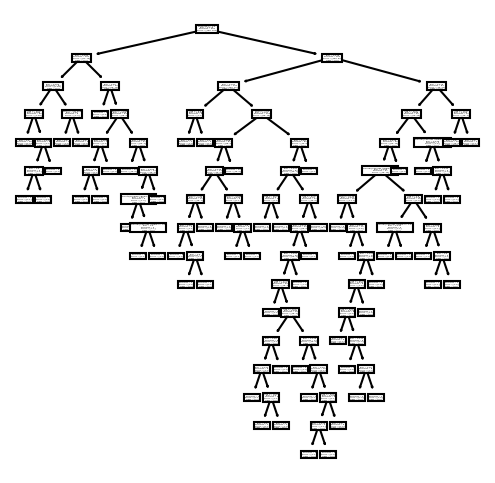

In [23]:
import matplotlib.pyplot as plt

clf = tree.DecisionTreeClassifier()

clf.fit(X, y)

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=150)
tree.plot_tree(clf, feature_names = X.columns, class_names=True) 

**b) Qual a acurácia do modelo obtida com os dados de validação?**

In [24]:
X_test = dfTitanic_test[["Pclass","Age","Siblings/Spouses Aboard","Parents/Children Aboard","Fare","SexCode"]]

print(X_test)

y_test = dfTitanic_test['Survived']
clf.score(X_test, y_test)

                                                 Pclass   Age  \
Name                                                            
Mr. Leslie Williams                                   3  28.5   
Mr. Karl Ivar Sven Berglund                           3  22.0   
Mr. Jacob Christian Milling                           2  48.0   
Mr. Michael Connaghton                                3  31.0   
Mr. Harry Homer                                       1  35.0   
...                                                 ...   ...   
Miss. Mary Agatha Glynn                               3  18.0   
Mrs. Frank Manley (Anna Sophia Atkinson) Warren       1  60.0   
Miss. Agda Thorilda Viktoria Lindahl                  3  25.0   
Sir. Cosmo Edmund Duff Gordon                         1  49.0   
Mr. Fahim Leeni                                       3  22.0   

                                                 Siblings/Spouses Aboard  \
Name                                                                       
Mr

0.7310789049919485

**3- Considere ainda uma árvore de decisão para classificar se um indivíduo sobreviveu ou não com
base no dataset “titanic.csv”. Qual o resultado médio de acurácia utilizando a estratégia de
validação cruzada, 10-fold? Discuta os resultados.**

In [30]:
from sklearn.model_selection import cross_val_score

X = dfTitanic[["Pclass","Age","Siblings/Spouses Aboard","Parents/Children Aboard","Fare","SexCode"]]
y = dfTitanic['Survived']

tree_model = tree.DecisionTreeClassifier()

scores = cross_val_score(tree_model, X, y, cv=10)

print(scores.mean())

print(scores.std())

0.7881256384065372
0.034729935252538924


A estratégia de validação cruzada 10-fold parece melhorar muito os resultados. 

**4- Ainda considerando o dataset “titanic.csv”, construa um modelo utilizando k-NN para prever o
tipo de planta. Considere diferentes valores de k vizinhos. Houve variação significativa nos
diferentes modelos testados? Algum deles foi melhor do que a estratégia baseada em árvore de
decisão?**

In [31]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)

scores = cross_val_score(neigh, X, y, cv=10)

scores.mean()

0.7148493360572011

In [41]:
neigh = KNeighborsClassifier(n_neighbors=5)

scores = cross_val_score(neigh, X, y, cv=10)

scores.mean()

0.7058350357507661

Nenhum dos casos utilizando a estratégia k-NN foi melhor do que a árvore de decisão.
Alterar a quatidade de k-vizinhos pareceu piorar mais ainda os resultados.

**5- Identifique quais atributos poderiam ser criados com base nos atributos atuais do dataset
“titanic.csv”. Liste esses atributos. Esses novos atributos ajudam a melhorar o desempenho de
classificação de sobreviventes?**

In [62]:
dfTitanic.loc[dfTitanic["Age"] < 50.0, "NewAge"] = "Adult"
dfTitanic.loc[dfTitanic["Age"] < 30.0, "NewAge"] = "Young"
dfTitanic.loc[dfTitanic["Age"] >= 50.0, "NewAge"] = "Old"
dfTitanic

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,SexCode,NewAge
Name,,,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500,1,Young
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833,0,Adult
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250,0,Young
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000,0,Adult
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500,1,Adult
...,...,...,...,...,...,...,...,...,...
Rev. Juozas Montvila,0,2,male,27.0,0,0,13.0000,1,Young
Miss. Margaret Edith Graham,1,1,female,19.0,0,0,30.0000,0,Young
Miss. Catherine Helen Johnston,0,3,female,7.0,1,2,23.4500,0,Young


In [67]:
dfTitanic['NewAge'] = pd.Categorical(dfTitanic['NewAge'])

dfTitanic['NewAge'] = dfTitanic['NewAge'].cat.codes

dfTitanic

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,SexCode,NewAge
Name,,,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500,1,2
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833,0,0
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250,0,2
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000,0,0
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500,1,0
...,...,...,...,...,...,...,...,...,...
Rev. Juozas Montvila,0,2,male,27.0,0,0,13.0000,1,2
Miss. Margaret Edith Graham,1,1,female,19.0,0,0,30.0000,0,2
Miss. Catherine Helen Johnston,0,3,female,7.0,1,2,23.4500,0,2


In [69]:
X = dfTitanic[["Pclass","NewAge","Siblings/Spouses Aboard","Parents/Children Aboard","Fare","SexCode"]]
y = dfTitanic['Survived']

tree_model = tree.DecisionTreeClassifier()

scores = cross_val_score(tree_model, X, y, cv=10)

print(scores.mean())

print(scores.std())

0.7959525025536262
0.03267506356544233


A criação de um novo atributo de idades discretizadas parece apresentar uma pequena melhora nos resutados.